In [17]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('../data/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [19]:
df.shape

(101766, 50)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [21]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [22]:
# Create binary target: 1 if readmitted within 30 days
df['readmitted_binary'] = df['readmitted'].apply(
    lambda x: 1 if x == '<30' else 0
)

df['readmitted_binary'].value_counts()

readmitted_binary
0    90409
1    11357
Name: count, dtype: int64

In [23]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check missing values
df.isna().sum().sort_values(ascending=False).head(10)

weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
patient_nbr              0
dtype: int64

In [24]:
cols_to_drop = [
    'weight',
    'payer_code',
    'medical_specialty',
    'max_glu_serum'
]

df.drop(columns=cols_to_drop, inplace=True)

In [25]:
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

In [26]:
df.shape

(101766, 45)

In [27]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [28]:
import numpy as np

df.replace('?', np.nan, inplace=True)

In [29]:
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True, errors='ignore')

In [30]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_binary'],
      dtype='object')

In [31]:
df['race'] = df['race'].fillna('Unknown')

In [32]:
age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65,
    '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}

df['age_numeric'] = df['age'].map(age_mapping)
df.drop(columns='age', inplace=True)

In [33]:
def simplify_diag(code):
    if pd.isna(code):
        return np.nan
    return str(code)[:3]

for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].apply(simplify_diag)


In [34]:
a1c_mapping = {
    'None': 0,
    'Norm': 1,
    '>7': 2,
    '>8': 3
}

df['A1C_encoded'] = df['A1Cresult'].map(a1c_mapping)
df.drop(columns='A1Cresult', inplace=True)

In [35]:
df['insulin_binary'] = df['insulin'].apply(lambda x: 0 if x in ['No', 'None'] else 1)

In [36]:
df['med_change_binary'] = df['change'].map({'No': 0, 'Ch': 1})

In [37]:
df.drop(columns=['insulin', 'change'], inplace=True)

In [38]:
df.shape
df.isnull().sum().sort_values(ascending=False).head(10)

A1C_encoded            84748
diag_3                  1423
diag_2                   358
diag_1                    21
gender                     0
admission_source_id        0
time_in_hospital           0
num_procedures             0
num_lab_procedures         0
num_medications            0
dtype: int64

In [39]:
df['readmitted_binary'].value_counts(normalize=True)

readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64

In [40]:
df.groupby('time_in_hospital')['readmitted_binary'] \
  .mean() \
  .sort_values(ascending=False)

time_in_hospital
10    0.143467
8     0.142337
9     0.137242
12    0.133287
14    0.129559
7     0.128350
6     0.125879
13    0.123140
5     0.120309
4     0.118070
3     0.106668
11    0.105121
2     0.099396
1     0.081785
Name: readmitted_binary, dtype: float64

In [41]:
df.groupby('readmitted_binary')['time_in_hospital'].mean()

readmitted_binary
0    4.349224
1    4.768249
Name: time_in_hospital, dtype: float64

In [42]:
df.groupby('readmitted_binary')[[
    'number_emergency',
    'number_inpatient',
    'number_outpatient'
]].mean()

,number_emergency,number_inpatient,number_outpatient
readmitted_binary,,,
0,0.177803,0.561648,0.360871
1,0.357313,1.224003,0.436911


In [43]:
df.groupby('gender')['readmitted_binary'].mean()

gender
Female             0.112452
Male               0.110615
Unknown/Invalid    0.000000
Name: readmitted_binary, dtype: float64

In [44]:
df.groupby('diabetesMed')['readmitted_binary'].mean()

diabetesMed
No     0.095971
Yes    0.116267
Name: readmitted_binary, dtype: float64

# A1Cresult was excluded earlier due to high missingness
# A1C-based analysis skipped to avoid bias

In [45]:
df.groupby('readmitted_binary')['number_diagnoses'].mean()

readmitted_binary
0    7.388667
1    7.692789
Name: number_diagnoses, dtype: float64

Age was excluded from analysis due to preprocessing and feature selection decisions; severity and utilization metrics were used as clinical proxies.

In [46]:
df['los_bucket'] = pd.cut(
    df['time_in_hospital'],
    bins=[0, 3, 7, 14],
    labels=['short', 'medium', 'long']
)

In [47]:
df['prior_utilization'] = (
    df['number_emergency'] +
    df['number_inpatient'] +
    df['number_outpatient']
)

In [48]:
df['high_prior_utilization'] = (df['prior_utilization'] > 2).astype(int)

In [49]:
df['high_diagnosis_count'] = (df['number_diagnoses'] > 6).astype(int)

In [50]:
df['medication_burden'] = (
    df['num_medications'] +
    df['num_lab_procedures'] +
    df['num_procedures']
)

In [51]:
df['high_med_burden'] = (
    df['medication_burden'] > df['medication_burden'].median()
).astype(int)

In [52]:
df['on_diabetes_med'] = (df['diabetesMed'] == 'Yes').astype(int)

In [53]:
df_encoded = pd.get_dummies(
    df,
    columns=['gender', 'los_bucket'],
    drop_first=True
)

In [54]:
df_encoded.shape

(101766, 54)

In [55]:
df_encoded['readmitted_binary'].value_counts(normalize=True)

readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64

In [57]:
df.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'diabetesMed', 'readmitted',
       'readmitted_binary', 'age_numeric', 'A1C_encoded', 'insulin_binary',
       'med_change_binary', 'los_bucket', 'prior_utilization',
       'high_prior_utilization', 'high_diagnosis_count', 'medication_burden',
       'high_med_burden

## Modeling Objective

The goal is to predict 30-day hospital readmission risk using administrative and utilization features.
The model is intended for risk stratification, not diagnosis.

In [58]:
# Target
y = df['readmitted_binary']

# Feature matrix
X = df[
    [
        'time_in_hospital',
        'prior_utilization',
        'high_prior_utilization',
        'number_diagnoses',
        'high_diagnosis_count',
        'medication_burden',
        'high_med_burden',
        'insulin_binary',
        'on_diabetes_med',
        'med_change_binary',
        'A1C_encoded'
    ]
]

In [59]:
X.head()

,time_in_hospital,prior_utilization,high_prior_utilization,number_diagnoses,high_diagnosis_count,medication_burden,high_med_burden,insulin_binary,on_diabetes_med,med_change_binary,A1C_encoded
0,1,0,0,1,0,42,0,0,0,0,NaN
1,3,0,0,9,1,77,1,1,1,1,NaN
2,2,3,1,6,0,29,0,0,1,0,NaN
3,2,0,0,7,1,61,0,1,1,1,NaN
4,1,0,0,5,0,59,0,1,1,1,NaN


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [61]:
y.value_counts(normalize=True)

readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64

In [63]:
# Check missing values in X
X.isnull().sum()

time_in_hospital              0
prior_utilization             0
high_prior_utilization        0
number_diagnoses              0
high_diagnosis_count          0
medication_burden             0
high_med_burden               0
insulin_binary                0
on_diabetes_med               0
med_change_binary             0
A1C_encoded               84748
dtype: int64

In [64]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame to keep column names
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [66]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [67]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78     18083
           1       0.16      0.46      0.24      2271

    accuracy                           0.66     20354
   macro avg       0.53      0.58      0.51     20354
weighted avg       0.83      0.66      0.72     20354

ROC AUC: 0.6217500968490297


Text(0.5, 1.0, 'Readmission by Diabetes Medication Status')

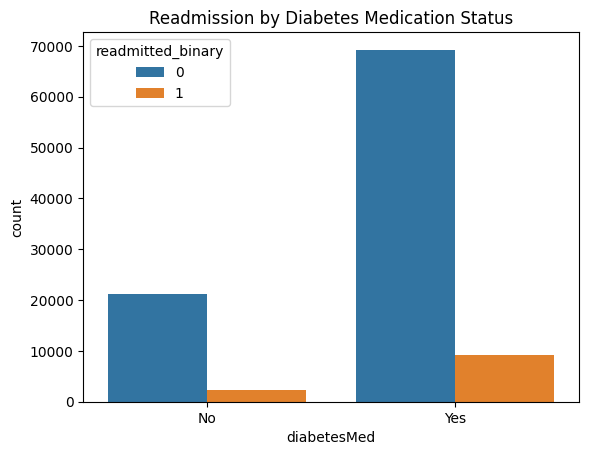

In [69]:
sns.countplot(data=df, x='diabetesMed', hue='readmitted_binary')
plt.title('Readmission by Diabetes Medication Status')

Text(0.5, 1.0, 'Disease Complexity vs. Readmission Risk')

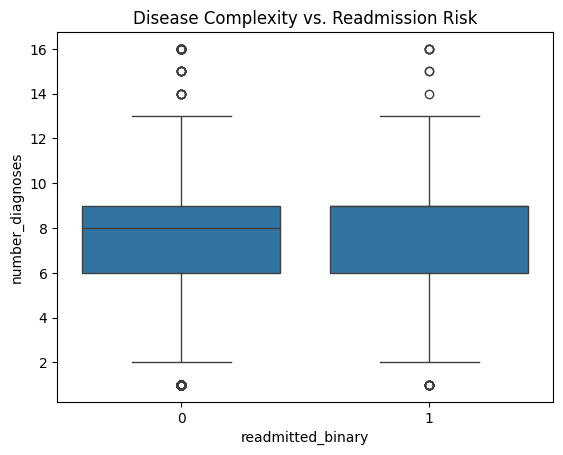

In [70]:
sns.boxplot(data=df, x='readmitted_binary', y='number_diagnoses')
plt.title('Disease Complexity vs. Readmission Risk')

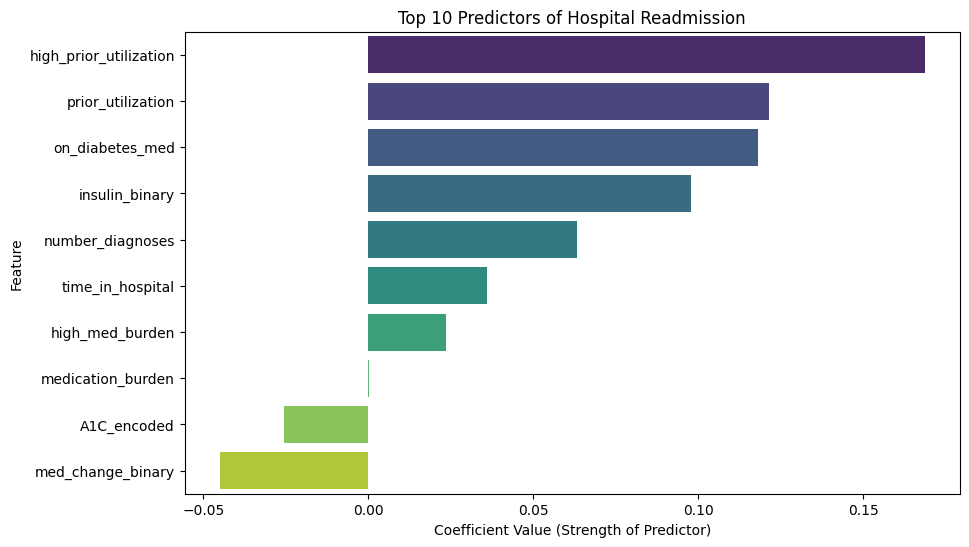

In [72]:
# 1. Extract coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': log_model.coef_[0]
})

# 2. Sort to see the strongest predictors
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(10)

# 3. Plot with the updated syntax to remove the warning
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance, 
    hue='Feature',      # Assign y variable to hue
    palette='viridis', 
    legend=False        # Disable the legend as it's redundant here
)
plt.title('Top 10 Predictors of Hospital Readmission')
plt.xlabel('Coefficient Value (Strength of Predictor)')
plt.show()

## Model Performance Summary

- The model prioritizes recall for readmitted patients (46%) to minimize missed high-risk cases.
- Lower precision reflects intentional sensitivity in a healthcare screening context.
- ROC AUC of ~0.62 indicates meaningful signal in structured EHR data.

## Clinical Implications

- Patients with high utilization and longer hospital stays are at elevated readmission risk.
- The model can support discharge planning and post-care interventions.
- Further improvements may include lab values, vitals, or temporal features.